# Exploratory Data Visualization

Set dependencies and import dataset:

In [2]:
import pandas as pd

#load dataset
df = pd.read_csv('vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [4]:
df['Cylinders'].head()

0    4.0
1    6.0
2    4.0
3    6.0
4    6.0
Name: Cylinders, dtype: float64

In [5]:
df['Cylinders'].describe()

count    35952.000000
mean         5.765076
std          1.755268
min          2.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: Cylinders, dtype: float64

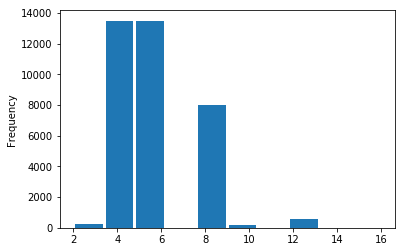

In [11]:
df['Cylinders'].plot(
    kind = 'hist',
    rwidth = 0.9
)


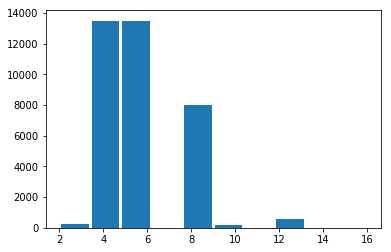

In [15]:
df['Cylinders'].hist(
    rwidth = 0.9,
    grid = False
)


In [16]:
len(df['Cylinders'].unique())

9

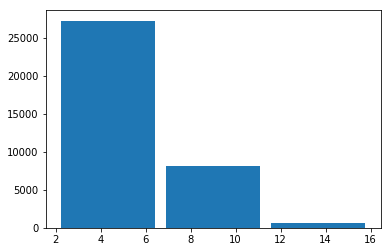

In [19]:
df['Cylinders'].hist(
    rwidth = 0.9,
    grid = False,
    bins = 3
)


In [20]:
df['Drivetrain'].head()
#Categorical data

0       2-Wheel Drive
1       2-Wheel Drive
2    Rear-Wheel Drive
3    Rear-Wheel Drive
4    Rear-Wheel Drive
Name: Drivetrain, dtype: object

In [21]:
df['Drivetrain'].describe()

count                 35952
unique                    8
top       Front-Wheel Drive
freq                  13044
Name: Drivetrain, dtype: object

In [25]:
df['Drivetrain'].value_counts()

Front-Wheel Drive             13044
Rear-Wheel Drive              12726
4-Wheel or All-Wheel Drive     6503
All-Wheel Drive                2039
4-Wheel Drive                  1058
2-Wheel Drive                   423
Part-time 4-Wheel Drive         158
2-Wheel Drive, Front              1
Name: Drivetrain, dtype: int64

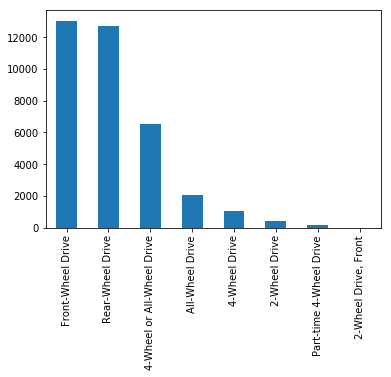

In [26]:
df['Drivetrain'].value_counts().plot(kind = 'bar')

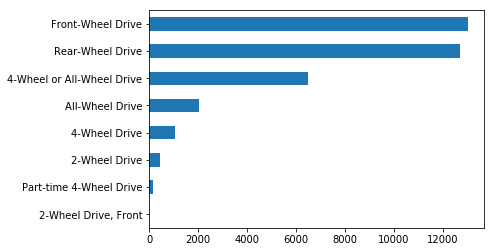

In [30]:
df['Drivetrain'].value_counts(ascending = True).plot(kind = 'barh')

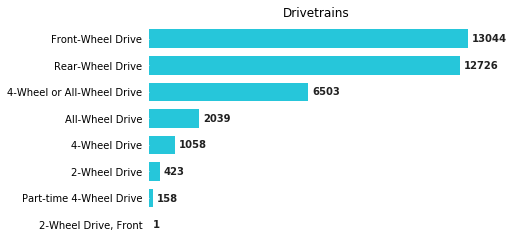

In [35]:
ax = df['Drivetrain'].value_counts(ascending = True).plot(kind = 'barh')

ax.set_title('Drivetrains')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis = u'both', which = u'both', color = 'white')

#Move x values to bar ends
ax.get_xaxis().set_visible(False)
for i, val in enumerate(df['Drivetrain'].value_counts(ascending = True)):
    ax.text(val + 150, i - .125, str(val), color = '#212121', fontweight = 'bold')
    
ax = df['Drivetrain'].value_counts(ascending = True).plot(
    kind = 'barh',
    color = '#26c6da',
    width = 0.7
)

# Box Plots

In [36]:
df['Combined MPG'].describe()

count    35952.000000
mean        19.929322
std          5.112409
min          7.000000
25%         16.000000
50%         19.000000
75%         23.000000
max         56.000000
Name: Combined MPG, dtype: float64

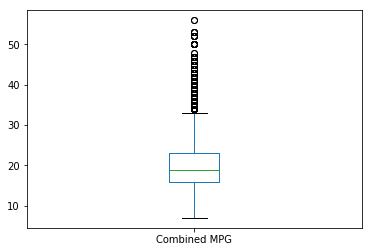

In [37]:
df['Combined MPG'].plot(kind = 'box')

# Seaborn

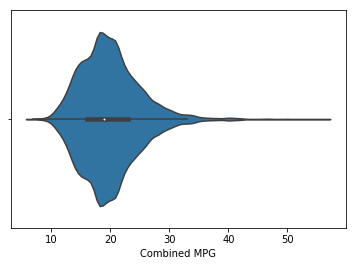

In [38]:
import seaborn as sns

sns.violinplot('Combined MPG', data = df)

# MatPlotLib

In [61]:
%matplotlib inline

import matplotlib.pyplot as plt

In [41]:
mpg = df.groupby('Year')['City MPG', 'Highway MPG'].mean().reset_index()

mpg.head()

,Year,City MPG,Highway MPG
0,1984,15.485271,19.075969
1,1985,17.872233,23.045541
2,1986,17.675926,22.717172
3,1987,17.414858,22.601836
4,1988,17.321716,22.686327


In [47]:
trend = mpg.query(f"Year == {mpg['Year'].min()} or Year == {mpg['Year'].max()}")

trend

,Year,City MPG,Highway MPG
0,1984,15.485271,19.075969
33,2017,20.336056,27.651109


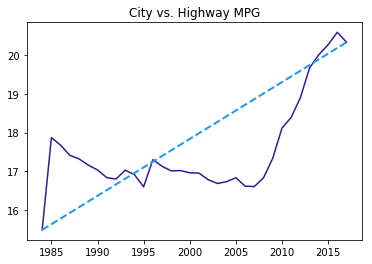

In [60]:
plt.title('City vs. Highway MPG')

plt.plot(
    mpg['Year'], #x axis
    mpg['City MPG'], #y axis
    color = '#311b92'
)

plt.plot(
    trend['Year'],
    trend['City MPG'],
    ls = '--',
    lw = 2,
    color = '#2196f3'
)

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ebad6a0>,
       dtype=object))

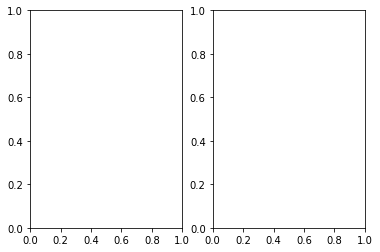

In [62]:
plt.subplots(1,2) #n_rows, n_cols

Text(0, 0.5, 'Highway MPG')

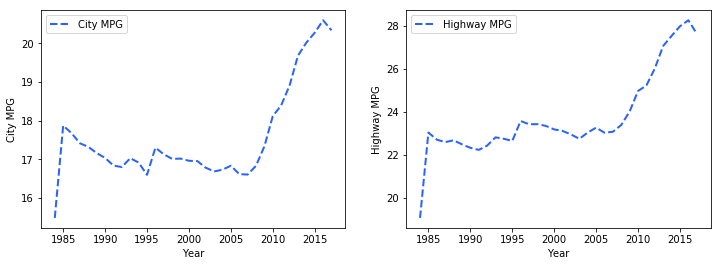

In [86]:
fig, axs = plt.subplots(1,2, figsize = (12, 4)) 
# color = '#2962ff', ls, lw

axs[0].plot(
    mpg['Year'], #x axis
    mpg['City MPG'], #y axis
    color = '#2962ff',
    ls = '--',
    lw = 2
)

axs[1].plot(
    mpg['Year'], #x axis
    mpg['Highway MPG'], #y axis
    color = '#2962ff',
    ls = '--',
    lw = 2
)

axs[0].legend()
axs[1].legend()

axs[0].set_xlabel('Year')
axs[0].set_ylabel('City MPG')

axs[1].set_xlabel('Year')
axs[1].set_ylabel('Highway MPG')

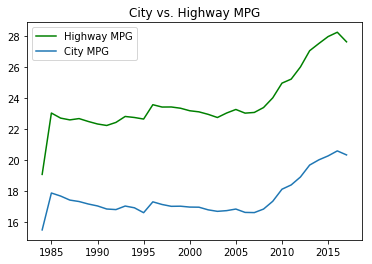

In [87]:
plt.title("City vs. Highway MPG")

plt.plot(
    mpg['Year'],
    mpg['Highway MPG'],
    color = 'green'
)
plt.plot(
    mpg['Year'], # x axis
    mpg['City MPG'] # y axis
)

plt.legend()

Alternate syntax using ```.sca()``` ('set current Axes object')

Text(0, 0.5, 'Highway MPG')

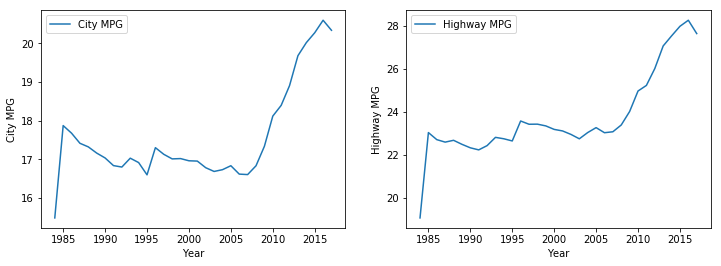

In [88]:
fig, axs = plt.subplots(
    1, # ncols
    2, # nrows
    figsize = (12, 4)
)

fig.sca(axs[0]) # Call .sca() on the Figure object to set
plt.plot(
    mpg['Year'], # x axis
    mpg['City MPG'] # y axis
)
plt.legend()
plt.xlabel('Year') # Not .set_xlabel() !!!
plt.ylabel('City MPG')

fig.sca(axs[1])
plt.plot(
    mpg['Year'],
    mpg['Highway MPG']
)
plt.legend()
plt.xlabel('Year') # Not .set_xlabel() !!!
plt.ylabel('Highway MPG')